In [1]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import pandas as pd
import codecs

In [27]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)


In [28]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']
Vowel signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']
Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']
Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']
Punctuation marks: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']
Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [2]:
import csv


INPUT_FILE = 'yt.csv'
stopwords_list = 'stopwords.txt'

counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list, 'r', encoding='utf-8').read().split()

with codecs.open(INPUT_FILE, "r", encoding='utf-8') as fin:
    # Update the delimiter based on your CSV file's format
    csv_reader = csv.reader(fin, delimiter=',')  # Change ',' to your actual delimiter
    next(csv_reader)  # Skip the header row if your CSV has a header
    for line in csv_reader:
        try:
            label, sent = line[3], line[2]
            print("Label: ", label)
            print("Sentence: ", sent)

            words = tokenizer.word_tokenizer(sent)
            print("After Tokenizing: ", words)

            punctuations = ['.', ',', ';', ':', '!', '?', '']
            wordsExcludingPunctuationMarks = [word for word in words if word not in punctuations]
            print("Truncating punctuation:", wordsExcludingPunctuationMarks)
            
            wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
            print("Truncating StopWords:", wordsExcludingStopWords)

            ys.append(int(label))
            xs.append(' '.join(wordsExcludingStopWords))
        except IndexError:
            print("Error processing line:", line)


Label:  1
Sentence:  I have spent an productive hour with this video. I watched this video without skipping any sequence. The story telling was great from Shahrose vai. Currently,, I am studying in CSE but I like this type podcast by which I can spent my leisure time very productively and this video is one of them. Thanks a lot. Doing great guys.
After Tokenizing:  ['I', 'have', 'spent', 'an', 'productive', 'hour', 'with', 'this', 'video', '.', 'I', 'watched', 'this', 'video', 'without', 'skipping', 'any', 'sequence', '.', 'The', 'story', 'telling', 'was', 'great', 'from', 'Shahrose', 'vai', '.', 'Currently,', ',', 'I', 'am', 'studying', 'in', 'CSE', 'but', 'I', 'like', 'this', 'type', 'podcast', 'by', 'which', 'I', 'can', 'spent', 'my', 'leisure', 'time', 'very', 'productively', 'and', 'this', 'video', 'is', 'one', 'of', 'them', '.', 'Thanks', 'a', 'lot', '.', 'Doing', 'great', 'guys', '.']
Truncating punctuation: ['I', 'have', 'spent', 'an', 'productive', 'hour', 'with', 'this', 'vid

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [30]:
xs

['I have spent an productive hour with this video I watched this video without skipping any sequence The story telling was great from Shahrose vai Currently, I am studying in CSE but I like this type podcast by which I can spent my leisure time very productively and this video is one of them Thanks a lot Doing great guys',
 'One of the best postcard in 2cent podcast Love from dhaka ️ thanks for sharing your thoughs and we know you are the greatest mentor in the field Difference between you and other marketer They teach how it will works and you know whats going on in the audience and what they want️',
 'Thank you Nafeez bhai to invite him this extra ordinary session',
 'নাফিস ভাই দক্ষিণ এশিয়ার সেরা উদ্যোক্তা পুরস্কার প্রাপ্ত বাংলাদেশের জনপ্রিয় অ্যাপস ডেভেলপার মো জোবায়ের হোসেন ভাই আপনাদের পোগ্রামে চাই প্লিজ প্লিজ প্লিজ',
 "things I learnt in a new fashion -> you can start with zero capital creating ( content funneling people who want to read it to an ebook ) -> storytelling capturing

###TF IDF

In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=5)
Xtrain

['ভালো লাগার একজন\u200c মানুষ ।',
 "Met Sazzad vaia today at Jolshiri central park in Adamjee's Study tour",
 'Unake deke ami amr journey start korsi… Purai hopeless silam … hoito kisu hobe na amk diye … but vhai k deke abr new start korlam sob… inshallah vai er sathe deka korte jabo akdin️',
 'Best Podcast.. Best of luck vaiya ️',
 "Well marketing is a cool thing we agree But is it morally fine to sell a stuff at 2000 which should be sold at 1000 Won't it be injustice if we think about the quality",
 'Wow bhaia',
 'Love you trainer Saharose Fardi',
 'চমৎকার আলোচনা । ShahRose Fardi ভাই সত্যিকার অর্থেই একজন অসাধারণ ব্যাক্তি ।',
 'অসাধারণ ফারদি ভাইয়ার ইবুক পড়েছি মেসেজে । কথাও । বলেছিলেন হেল্প । কথা ব্যস্ততার কারনে ।',
 'আলহামদৃুুলািল্লাহ',
 'শাহরোজ ফারদি ভাইয়ের শেখানোর পদ্ধতিটা সুন্দর । উনার ফ্রি ক্লাসগুলো করছি । উনাকে পডকাস্টে ভালো লাগলো ।',
 'Wow bhaia',
 'Bring Numeri sattar apar from ACS He recently generated 12 crores from a single course(2 )',
 'Great men',
 'যতগুলা কথাবার্তা হয়

In [4]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)

n_samples: 2943, n_features: 6390


c:\users\touhid\documents\nlp2\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)

n_samples: 981, n_features: 6390


### Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)
y_pred = naive_bayes_classifier.predict(Xtest_tf)

[[  4   0   0]
 [  0 273   0]
 [  5   0 699]]
0.9949031600407747
              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       1.00      1.00      1.00       273
           2       1.00      0.99      1.00       704

    accuracy                           0.99       981
   macro avg       0.81      1.00      0.87       981
weighted avg       1.00      0.99      1.00       981



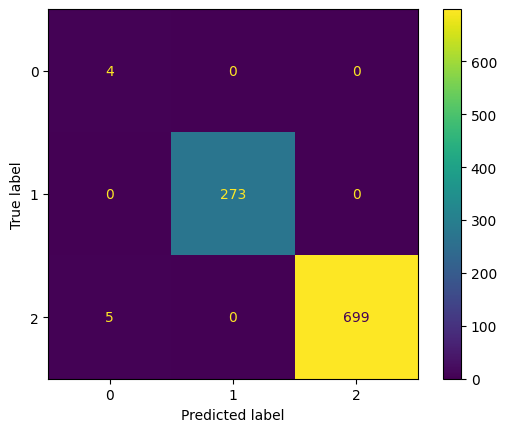

In [7]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=naive_bayes_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=naive_bayes_classifier.classes_)
disp.plot()
plt.show()

### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)

[[  4   0   0]
 [  0 273   0]
 [  0   0 704]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       704

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



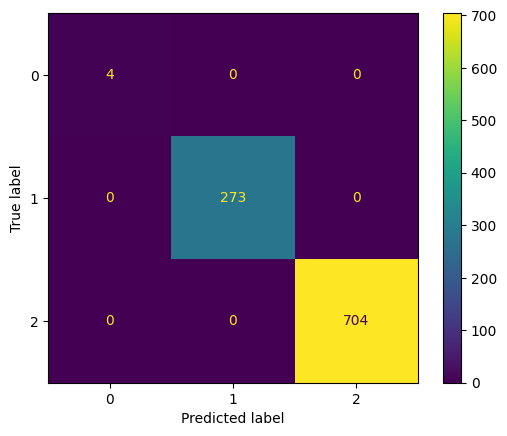

In [9]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=LRClassification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=LRClassification.classes_)
disp.plot()
plt.show()

###Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

[[  4   0   0]
 [  0 273   0]
 [  0   0 704]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       704

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



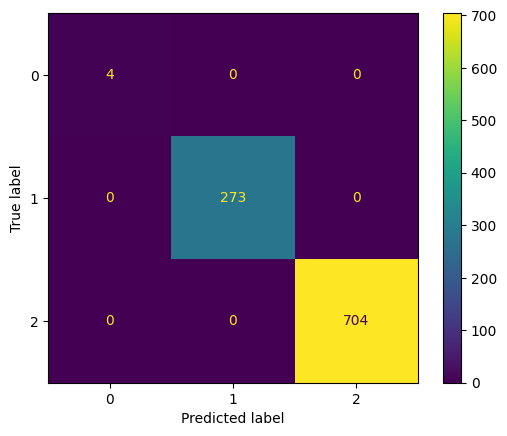

In [11]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=DTClassification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=DTClassification.classes_)
disp.plot()
plt.show()

### SVM

In [12]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[  4   0   0]
 [  0 273   0]
 [  0   0 704]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       704

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



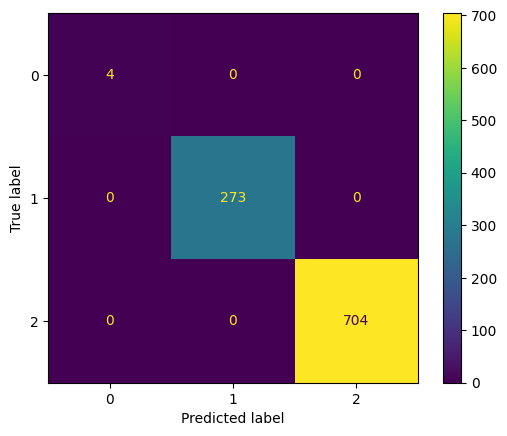

In [13]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[  4   0   0]
 [  0 273   0]
 [  0   0 704]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       704

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



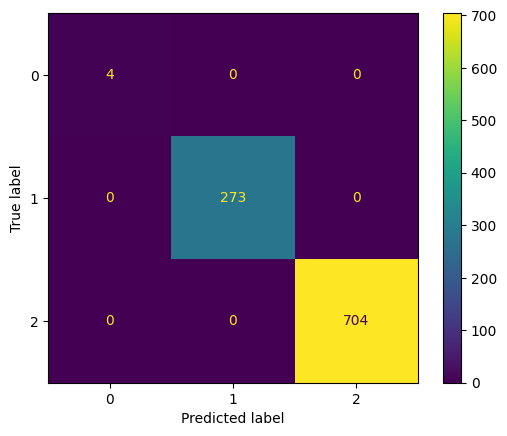

In [15]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_classifier.classes_)
disp.plot()
plt.show()

### SGD

In [16]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'squared_error',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

c:\users\touhid\documents\nlp2\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[[  0   0   4]
 [194  25  54]
 [615  43  46]]
0.07237512742099898
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.37      0.09      0.15       273
           2       0.44      0.07      0.11       704

    accuracy                           0.07       981
   macro avg       0.27      0.05      0.09       981
weighted avg       0.42      0.07      0.12       981



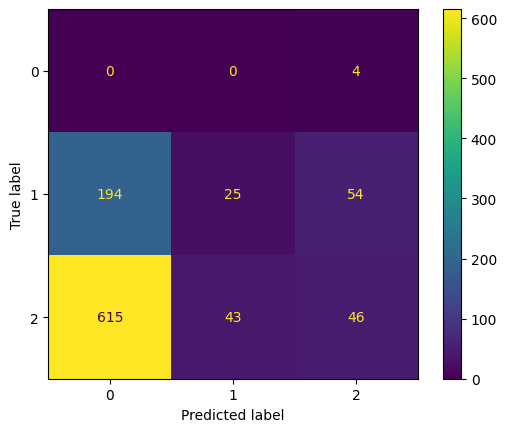

In [17]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=sgd_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_classifier.classes_)
disp.plot()
plt.show()

### SVM RS

In [20]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}
              
rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(Xtrain_tf, Ytrain) 
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)
  

c:\users\touhid\documents\nlp2\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


[[  0   4   0]
 [ 36 181  68]
 [ 97 550  45]]
0.23037716615698267
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.25      0.64      0.35       285
           2       0.40      0.07      0.11       692

    accuracy                           0.23       981
   macro avg       0.21      0.23      0.16       981
weighted avg       0.35      0.23      0.18       981



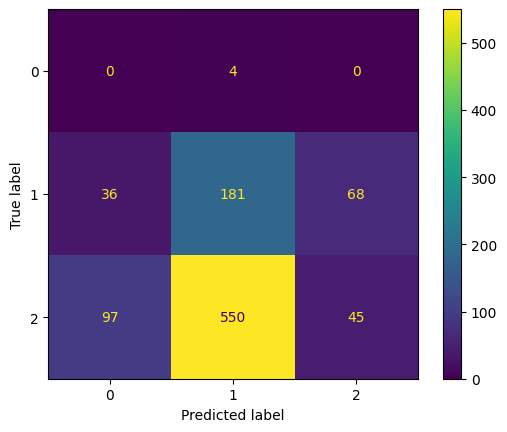

In [47]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))

cm = confusion_matrix(Ytest, y_pred, labels=rand_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rand_search.classes_)
disp.plot()
plt.show()

### XGBoost

Class mapping: {0: 0, 1: 1, 2: 2}
[[  4   0   0]
 [  0 285   0]
 [  0   0 692]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       692

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



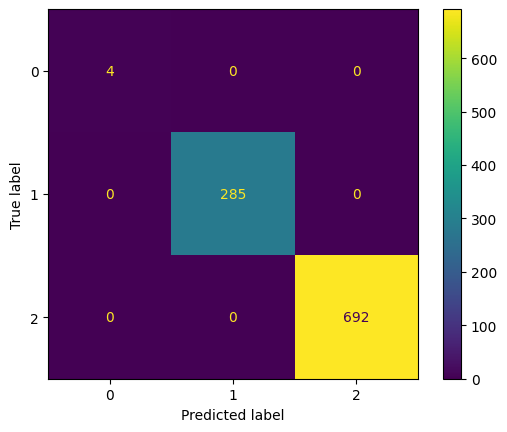

In [48]:
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

# Assuming Xtrain_tf, Ytrain, Xtest_tf, Ytest are already defined

# Use LabelEncoder to convert class labels to start from 0
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Mapping of original class labels to encoded class labels
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class mapping:", class_mapping)

# Create and train XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=100, random_state=0)
xgb_classifier.fit(Xtrain_tf, Ytrain_encoded)

# Make predictions
y_pred_xgb_encoded = xgb_classifier.predict(Xtest_tf)

# Convert back to original class labels for evaluation
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Print evaluation metrics
print(confusion_matrix(Ytest, y_pred_xgb))
print(accuracy_score(Ytest, y_pred_xgb))
print(classification_report(Ytest, y_pred_xgb))

# Plot confusion matrix
cm_xgb = confusion_matrix(Ytest, y_pred_xgb, labels=xgb_classifier.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                                  display_labels=xgb_classifier.classes_)
disp_xgb.plot()
plt.show()


### AdaBoost

/Users/sirajussalekin/Desktop/nlp-text-classification/myenv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[  4   0   0]
 [  0 280   5]
 [  0   0 692]]
0.9949031600407747
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.98      0.99       285
           2       0.99      1.00      1.00       692

    accuracy                           0.99       981
   macro avg       1.00      0.99      1.00       981
weighted avg       0.99      0.99      0.99       981



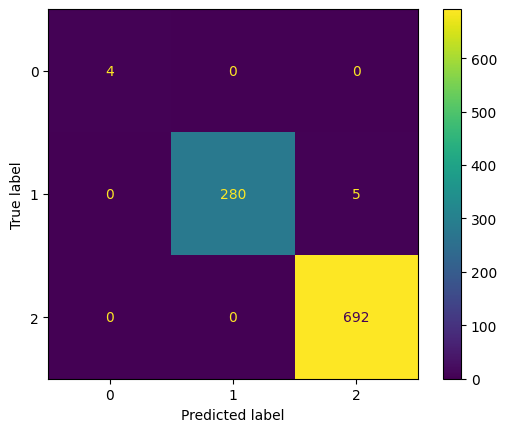

In [49]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming Xtrain_tf, Ytrain, Xtest_tf, Ytest are already defined

# Create and train AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost_classifier.fit(Xtrain_tf, Ytrain)

# Make predictions
y_pred_adaboost = adaboost_classifier.predict(Xtest_tf)

# Print evaluation metrics
print(confusion_matrix(Ytest, y_pred_adaboost))
print(accuracy_score(Ytest, y_pred_adaboost))
print(classification_report(Ytest, y_pred_adaboost))

# Plot confusion matrix
cm_adaboost = confusion_matrix(Ytest, y_pred_adaboost, labels=adaboost_classifier.classes_)
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost,
                                       display_labels=adaboost_classifier.classes_)
disp_adaboost.plot()
plt.show()


### GBM

[[  4   0   0]
 [  0 273   0]
 [  0   0 704]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       704

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



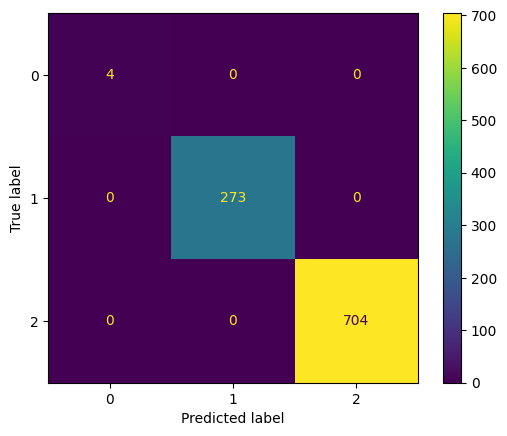

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming Xtrain_tf, Ytrain, Xtest_tf, Ytest are already defined

# Create and train Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbm_classifier.fit(Xtrain_tf, Ytrain)

# Make predictions
y_pred_gbm = gbm_classifier.predict(Xtest_tf)

# Print evaluation metrics
print(confusion_matrix(Ytest, y_pred_gbm))
print(accuracy_score(Ytest, y_pred_gbm))
print(classification_report(Ytest, y_pred_gbm))

# Plot confusion matrix
cm_gbm = confusion_matrix(Ytest, y_pred_gbm, labels=gbm_classifier.classes_)
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_gbm,
                                  display_labels=gbm_classifier.classes_)
disp_gbm.plot()
plt.show()
